In [1]:
import pandas as pd

# Create a new dataframe with columns and data
data = {'StarTag':['RightTop', 'LeftBottom', 'RightBottom','LeftTop','Center'],
        'RA': ['13:41:45.9732', '13:42:43.7230', '13:41:35.465', '13:42:28.5595','13:42:12.1238'],
        'DEC':['28:27:16.700', '28:15:53.329', '28:12:11.848','28:31:58.361','28:21:21.825'],
        'raw_x':[2113.06, 879.56, 2345.84,  1198.76,1554.07],
        'raw_y':[1930.32, 817.4, 460.32,2383.96,1351.17],
        'Bmag': [11, 12.857, 12.147, 11,12.14],
        'Vmag': [9.8, 12.772, 11.501, 10.4,22.579]}

df = pd.DataFrame(data)

In [2]:
df

,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag
0,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.000,9.800
1,LeftBottom,13:42:43.7230,28:15:53.329,879.56,817.40,12.857,12.772
2,RightBottom,13:41:35.465,28:12:11.848,2345.84,460.32,12.147,11.501
3,LeftTop,13:42:28.5595,28:31:58.361,1198.76,2383.96,11.000,10.400
4,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579


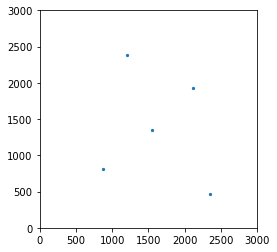

In [3]:

# importing the required module
import matplotlib.pyplot as plt
  
x = df["raw_x"]
y = df["raw_y"]
 
fig,ax = plt.subplots()
ax.scatter(x, y,s=5)
ax.set_aspect('equal')

plt.xlim(0,3000)
plt.ylim(0,3000)
plt.show()


In [1]:
from astropy.io import fits
import os
import pandas as pd
import glob
import numpy as np
from astropy import units as u

In [2]:
hdu = fits.open('../realObs/fits/NGC5272_V_new.fits')
hdu=hdu[0]
data = hdu.data

/tmp/ipykernel_86/3453199332.py:13: MatplotlibDeprecationWarning: Passing parameters norm and vmin/vmax simultaneously is deprecated since 3.3 and will become an error two minor releases later. Please pass vmin/vmax directly to the norm when creating it.
  ax.imshow(data, cmap='Greys', origin='lower', norm=norm,interpolation='nearest',vmax = 7000)


NameError: name 'df' is not defined

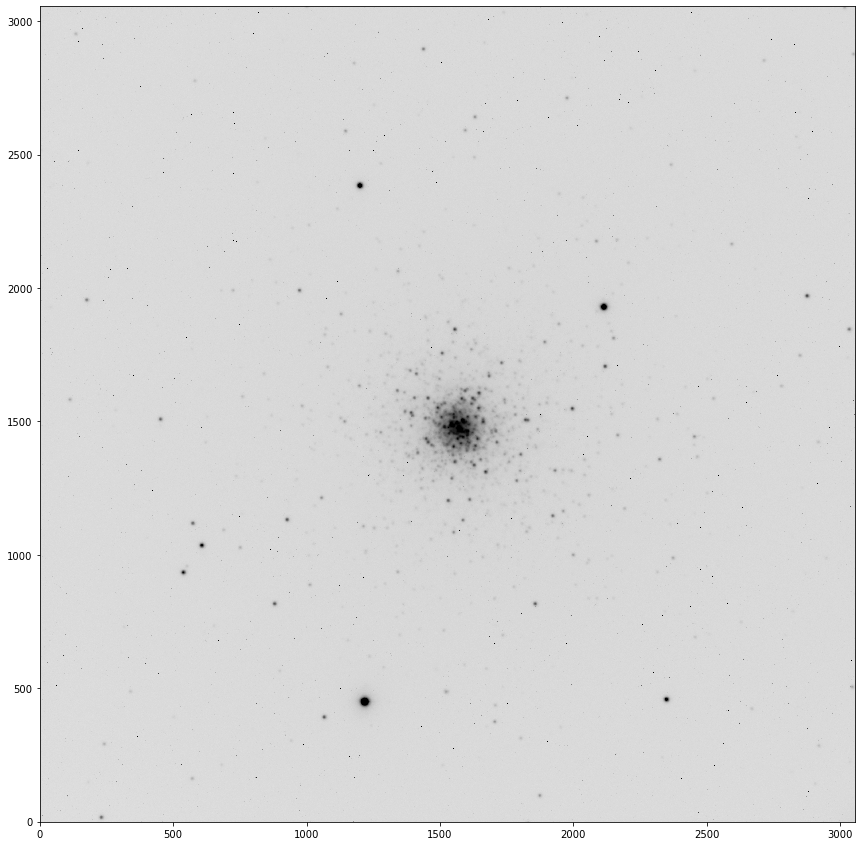

In [3]:

# importing modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from matplotlib.patches import Arrow, Circle

# customizing plot
norm = ImageNormalize(stretch=SqrtStretch())


fig, ax = plt.subplots(1,figsize=(15, 15))
ax.imshow(data, cmap='Greys', origin='lower', norm=norm,interpolation='nearest',vmax = 7000)

patches = []
#Circle((1000, 1000), radius=25, color='red')

for index, row in df.iterrows():
    patches.append(Circle((row['raw_x'], row['raw_y']), radius=15, color='red'))
for p in patches:
    ax.add_patch(p)

plt.colorbar(pixel_plot)
plt.title("pixel_plot")

plt.ylim(0,3000)
plt.show(pixel_plot)

In [8]:
data.shape

(3056, 3056)

In [13]:
import pandas as pd
result = pd.read_csv("result.csv")

<Figure size 432x288 with 0 Axes>

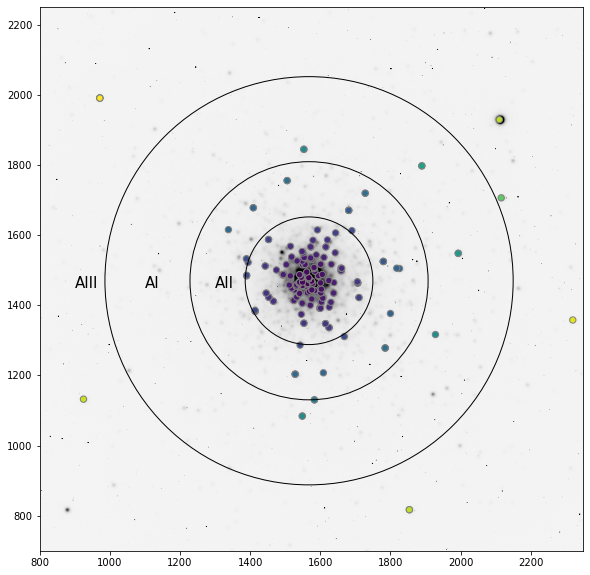

In [32]:

# importing modules
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization.mpl_normalize import ImageNormalize
from astropy.visualization import SqrtStretch
from matplotlib.patches import Arrow, Circle

# customizing plot
norm = ImageNormalize(stretch=SqrtStretch())
pixel_plot = plt.figure()
fig, ax = plt.subplots(1,figsize=(10, 10))
ax.imshow(data, cmap='Greys',vmax = 5000)

ax.set_aspect('equal')
# x axis values
x = result["xcentroid_V"]
# corresponding y axis values
y = result["ycentroid_V"]


scatter = ax.scatter(x, y,s=40, c= result["distance"] , cmap='viridis', marker = "o", facecolor = "white", edgecolor="gray")
circle1 = plt.Circle((1568, 1470), 2 * 91,  fill=False, lw=1, edgecolor='black')
circle2 = plt.Circle((1568, 1470), 3.5 * 97, fill=False, lw=1, edgecolor='black')
circle3 = plt.Circle((1568, 1470), 6 * 97, fill=False, lw=1, edgecolor='black')
ax.text(1300, 1450, f"AII",fontsize=15)
ax.text(1100, 1450, f"AI", fontsize=15)
ax.text(900, 1450, f"AIII", fontsize=15)


ax.add_patch(circle1)
ax.add_patch(circle2)
ax.add_patch(circle3)


plt.xlim(800,2350)
plt.ylim(700,2250)
fig.savefig('temp.png', transparent=True, bbox_inches='tight', pad_inches=0)
plt.show(pixel_plot)


In [146]:
Vtable = pd.read_csv('data/Vtable_Source.csv')
Btable = pd.read_csv('data/Btable_Source.csv')

In [135]:
mergeV = df.merge(Vtable, how='cross')
mergeB = df.merge(Btable, how='cross')

In [136]:
mergeV 

,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag,Unnamed: 0,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
0,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.00,9.800,0,1,21.002756,0.620500,0.791488,-0.376853,-0.548601,25,0.0,301.633617,1.727666,-0.593649
1,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.00,9.800,1,2,38.241919,0.732045,0.747388,-0.079008,-0.617443,25,0.0,251.389189,1.342446,-0.319742
2,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.00,9.800,2,3,51.013667,0.691893,0.619264,0.223140,-0.300389,25,0.0,235.111266,1.407768,-0.371328
3,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.00,9.800,3,4,218.923702,0.030619,0.238365,0.147541,-0.426111,25,0.0,143.692287,1.119231,-0.122299
4,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.00,9.800,4,5,472.022245,0.264790,0.642032,0.177453,-0.087960,25,0.0,181.694268,1.348260,-0.324435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7465,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.14,22.579,1489,1490,2834.968654,3049.287874,0.713262,0.391319,0.251351,25,0.0,148.620473,1.285665,-0.272820
7466,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.14,22.579,1490,1491,3013.091104,3050.212140,0.686435,-0.001924,-0.164120,25,0.0,751.523064,1.171419,-0.171781
7467,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.14,22.579,1491,1492,2990.914565,3051.804628,0.974157,-0.178853,0.062558,25,0.0,180.217582,1.323550,-0.304351
7468,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.14,22.579,1492,1493,513.492487,3053.755440,0.553895,-0.802456,-0.145762,25,0.0,325.002842,2.584973,-1.031140


In [137]:
fit_V = mergeV[(mergeV["xcentroid"] <= mergeV["raw_x"] + 4 ) & (mergeV["xcentroid"] >= mergeV["raw_x"] - 4)  &(mergeV["ycentroid"] <= mergeV["raw_y"] + 4 ) & (mergeV["ycentroid"] >= mergeV["raw_y"] - 4)  ]

In [138]:
fit_V

,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag,Unnamed: 0,id,xcentroid,ycentroid,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag
1098,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.000,9.800,1098,1099,2110.639166,1929.390303,0.375628,-0.021937,-0.020276,25,0.0,44758.931226,61.179057,-4.466507
1785,LeftBottom,13:42:43.7230,28:15:53.329,879.56,817.40,12.857,12.772,291,292,877.860102,817.273622,0.407605,-0.028799,0.024847,25,0.0,3114.325626,4.431437,-1.616362
3161,RightBottom,13:41:35.465,28:12:11.848,2345.84,460.32,12.147,11.501,173,174,2345.514747,459.378079,0.373416,-0.094632,-0.231750,25,0.0,10024.730707,15.129854,-2.949587
5737,LeftTop,13:42:28.5595,28:31:58.361,1198.76,2383.96,11.000,10.400,1255,1256,1197.206875,2383.826130,0.393408,-0.053235,-0.040598,25,0.0,23777.804674,35.159812,-3.865116
6502,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,526,527,1553.289848,1349.011027,0.369772,0.096134,0.288298,25,0.0,2981.145939,4.247378,-1.570302


In [139]:
mergeB["xcentroid_adj"] = mergeB["xcentroid"]+ (2110.64 - 2102.6)
mergeB["ycentroid_adj"] = mergeB["ycentroid"]-(1931.58 - 1929.39)

In [140]:
fit_B = mergeB[(mergeB["xcentroid_adj"] <= mergeB["raw_x"] + 4) & (mergeB["xcentroid_adj"] >= mergeB["raw_x"] - 4)  &(mergeB["ycentroid_adj"] <= mergeB["raw_y"] + 4 ) & (mergeB["ycentroid_adj"] >= mergeB["raw_y"] - 4)]

In [141]:
fit_B

,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag,Unnamed: 0,id,xcentroid,...,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag,xcentroid_adj,ycentroid_adj
894,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.000,9.800,894,895,2102.602811,...,0.397382,0.014661,0.165993,25,0.0,19678.604369,25.591491,-3.520239,2110.642811,1929.391119
1523,LeftBottom,13:42:43.7230,28:15:53.329,879.56,817.40,12.857,12.772,283,284,869.900890,...,0.332831,0.050896,0.004492,25,0.0,2248.592410,3.144675,-1.243940,877.940890,817.318437
2642,RightBottom,13:41:35.465,28:12:11.848,2345.84,460.32,12.147,11.501,162,163,2337.423898,...,0.348454,0.039378,0.047294,25,0.0,6976.737244,9.222798,-2.412157,2345.463898,459.338202
4750,LeftTop,13:42:28.5595,28:31:58.361,1198.76,2383.96,11.000,10.400,1030,1031,1189.178497,...,0.372077,-0.039324,0.193814,25,0.0,15926.064771,19.742794,-3.238522,1197.218497,2383.896444
5430,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,470,471,1545.581032,...,0.448654,0.240545,0.520017,25,0.0,1293.292716,1.549472,-0.475459,1553.621032,1349.390391
5431,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,471,472,1545.434211,...,0.687894,0.180616,0.212090,25,0.0,1144.597265,1.171561,-0.171913,1553.474211,1349.098886
5434,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,474,475,1547.561457,...,0.998900,0.789079,0.134837,25,0.0,850.788779,1.454283,-0.406623,1555.601457,1354.774601


In [143]:
fit_B = fit_B.drop(5431)
fit_B = fit_B.drop(5434)

In [144]:
fit_B

,StarTag,RA,DEC,raw_x,raw_y,Bmag,Vmag,Unnamed: 0,id,xcentroid,...,sharpness,roundness1,roundness2,npix,sky,peak,flux,mag,xcentroid_adj,ycentroid_adj
894,RightTop,13:41:45.9732,28:27:16.700,2113.06,1930.32,11.000,9.800,894,895,2102.602811,...,0.397382,0.014661,0.165993,25,0.0,19678.604369,25.591491,-3.520239,2110.642811,1929.391119
1523,LeftBottom,13:42:43.7230,28:15:53.329,879.56,817.40,12.857,12.772,283,284,869.900890,...,0.332831,0.050896,0.004492,25,0.0,2248.592410,3.144675,-1.243940,877.940890,817.318437
2642,RightBottom,13:41:35.465,28:12:11.848,2345.84,460.32,12.147,11.501,162,163,2337.423898,...,0.348454,0.039378,0.047294,25,0.0,6976.737244,9.222798,-2.412157,2345.463898,459.338202
4750,LeftTop,13:42:28.5595,28:31:58.361,1198.76,2383.96,11.000,10.400,1030,1031,1189.178497,...,0.372077,-0.039324,0.193814,25,0.0,15926.064771,19.742794,-3.238522,1197.218497,2383.896444
5430,Center,13:42:12.1238,28:21:21.825,1554.07,1351.17,12.140,22.579,470,471,1545.581032,...,0.448654,0.240545,0.520017,25,0.0,1293.292716,1.549472,-0.475459,1553.621032,1349.390391


In [147]:
fit_B.to_csv("data/refer_B.csv")
fit_V.to_csv("data/refer_V.csv")